# We are going to build a RandomForest model to predict survivors in the Titanic dataset

# Set Working Directory & Import Packages 

In [1]:
# Get your working directory right, i.e. where all your titatnic dataset is at
import os
os.getcwd()

'/Users/luajiongwei/Documents/GitHub/bootcamps-201819/Bootcamp 2'

In [2]:
# If the working directory is not where your titanic dataset is at, 
# then run the following command without the # sign:
# os.chdir('FOLDER CONTAINING YOUR TITANIC DATASET') 

In [3]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# If there is any import error, please run the following 4 lines without the # sign
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pipinstall sklearn

# 1. Data Preprocessing

In [5]:
# Import titanic taining data 
train_data = pd.read_csv('titanic_train.csv')

In [6]:
# Preview training data - first 5 columns
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get the dimensionality of the dataset 
train_data.shape
# No () is needed because shape is an attribute, not a method

(891, 12)

In [8]:
# Since we are not able to use all variables (e.g. name), for 
# the purpose of this bootcamp we will use only a few predictors
predictors = ['Survived','Pclass','Sex','Age','SibSp']

In [9]:
# Let's subset the original train_data and preview the subsetted data
train_subset = train_data[predictors]
train_subset.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [10]:
# Once again, let's check the dimensionality
train_subset.shape

(891, 5)

In [11]:
# Check is there are any null variables
train_subset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [12]:
# Since there are 177 missing rows for age, 
# we are going to drop them for this session

train_subset.dropna(how = 'any', inplace = True) 
# inplace = True ensures that we drop it on the train_subset 
# variable itself and do not need to define a new variable

#Let's check the dimensionality
train_subset.shape
# You should get (714, 5) as the shape. 891 - 177 = 714

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(714, 5)

In [13]:
# Let's visualise the dataset we are going to fit our model on again
train_subset.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [14]:
# Let's separate our variables again 
X = train_subset.drop('Survived', axis = 1)
Y = train_subset.Survived

In [15]:
# But the sci-kitlearn model cannot work with the Sex variable 
# if it takes on values 'Male' and 'Female', 
# it has to be encoded into numbers
# Thus we use the Label Binarizer in the sklearn preprocessing package
LB = preprocessing.LabelBinarizer()
X.Sex = LB.fit_transform(X.Sex)

In [16]:
# Let's check if the Sex variable has been transformed into numbers
X.head()

,Pclass,Sex,Age,SibSp
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0


In [17]:
# We are now ready to split our training data further into training and validation set

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

# 2. Fitting the Model

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True)

In [19]:
# With one line of code, we are now going to fit the model to the dataset
# This is why data scientists say 80% of 
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

# 3. Evaluating the Model

In [20]:
# As the model has been fitted to the 'training' set, we should evaluate
# its performance based on the validation set=
Y_val_pred = rf_classifier.predict(X_val)

In [21]:
# Now let's compute the accuracy_score
accuracy_score(Y_val, Y_val_pred)

0.8181818181818182

In [22]:
# But this does not tell us the breakdown of the error, so let's plot
# a confusion matrix, so we are going to use the yellowbrick package
# that allows us to plot confusion matrix quickly
!pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/ca/64/ffa3ae377d0841595335f9ae402ecd777d7a275746c7389feb68c1386110/yellowbrick-0.8-py2.py3-none-any.whl
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


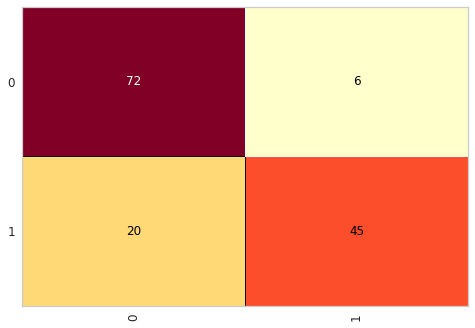

In [23]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf_classifier, classes = [0,1])
# Note that what the rf_classifier that is the argument in the Confusion_Matrix() function
# has already been fitted.

cm.score(X_val,Y_val)
# What is happening 'under the hood' of the cm.score function is that the model is predicting based on X_val,
# computing the correct and wrong for each class, and then creating the following visualisations